In [1]:
import pandas as pd
import numpy as np
from sargas import *
import matplotlib.pyplot as plt

# NVT Simulation

In [2]:
nparticles = 500

density = 9e-1
volume = nparticles / density
temperature = 9e-1
rc = 3.0

potential = Potential.lennard_jones(1.0, 1.0, rc, tail_correction=True)
configuration = Configuration.from_lattice(nparticles, density)
system = System(configuration, potential)
# system = System.insert_particles(nparticles, volume, temperature, 15, rc, potential, nparticles, 1000000)

displace_particle = MCMove.displace_particle(0.1, 0.4, temperature)
mc = MonteCarlo([displace_particle], [1], temperature)

simulation = Simulation.monte_carlo(system, mc, 500)

In [3]:
%%time
simulation.run(nparticles * 2000)

CPU times: user 8.59 s, sys: 0 ns, total: 8.59 s
Wall time: 8.57 s


In [4]:
system.energy, system.compute_energy()

(-3037.7639028633066, -3037.763902863329)

In [5]:
system.virial, system.compute_energy_virial()

(4565.288146852677, (-3037.763902863329, 4565.288146852663))

In [6]:
simulation.deactivate_propagator_updates()
props = Observer.properties(1000)
simulation.add_observer(props)
widom = Observer.widom_insertion(100)
simulation.add_observer(widom)

In [7]:
%%time
simulation.run(5_000_000)

CPU times: user 51.9 s, sys: 68.4 ms, total: 52 s
Wall time: 51.8 s


In [8]:
properties = pd.DataFrame(props.data)

In [9]:
print("u = {:.5e} +- {:.5e}".format(properties.energy.mean() / system.nparticles, properties.energy.sem() / system.nparticles))

u = -6.17972e+00 +- 6.10213e-04


In [10]:
print("p = {:.5e} +- {:.5e}".format(properties.pressure.mean() + density / temperature, properties.pressure.sem()))

p = 2.75709e+00 +- 3.09070e-03


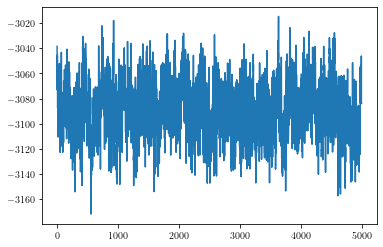

In [11]:
plt.plot(properties.energy)

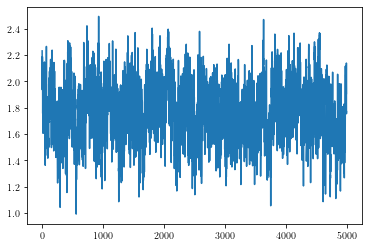

In [12]:
plt.plot(properties.pressure)

# NPT

In [2]:
nparticles = 500

density = 9e-1
volume = nparticles / density
temperature = 9e-1
pressure = 2.6
rc = 3.0

potential = Potential.lennard_jones(1.0, 1.0, rc, tail_correction=True)
configuration = Configuration.from_lattice(nparticles, density)
system = System(configuration, potential)

displace_particle = MCMove.displace_particle(0.1, 0.4, temperature)
change_volume = MCMove.change_volume(1.0, 0.5, pressure, temperature)
mc = MonteCarlo([displace_particle, change_volume], [nparticles, 1], temperature)

simulation = Simulation.monte_carlo(system, mc, 500)

In [10]:
%%time
simulation.run(500)

CPU times: user 7.81 ms, sys: 0 ns, total: 7.81 ms
Wall time: 7.77 ms


In [10]:
8.242245206501282**3

559.9336810224816

In [53]:
#simulation.deactivate_propagator_updates()
props = Observer.properties(1000)
simulation.add_observer(props)
widom = Observer.widom_insertion(100)
simulation.add_observer(widom)

In [60]:
simulation.run(10_000_000)

In [61]:
properties = pd.DataFrame(props.data)

In [56]:
print("u = {:.5e} +- {:.5e}".format(properties.energy.mean() / system.nparticles, properties.energy.sem() / system.nparticles))

u = -3.90237e+00 +- 3.07870e-03


In [57]:
print("p = {:.5e} +- {:.5e}".format(properties.pressure.mean() + properties.density.mean() / temperature, properties.pressure.sem()))

p = -1.65585e-01 +- 2.64276e-03


In [58]:
print("v = {:.5e} +- {:.5e}".format(properties.volume.mean(), properties.volume.sem()))

v = 1.13028e+03 +- 2.52747e+00


In [49]:
properties.describe()

,pressure,energy,virial,density,nparticles,volume
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.0,12000.000000
mean,-0.633980,-1942.384010,-1598.590467,0.452219,500.0,1175.270262
std,0.275540,170.388239,402.476879,0.111537,0.0,288.604181
min,-1.494523,-2458.957315,-2925.122530,0.290929,500.0,733.633595
25%,-0.863418,-2024.491242,-1888.146343,0.350475,500.0,921.633595
50%,-0.575487,-1934.260912,-1597.517112,0.437203,500.0,1143.633595
75%,-0.400315,-1805.103099,-1317.616372,0.542515,500.0,1426.633595
max,-0.096893,-1560.663051,-160.975126,0.681539,500.0,1718.633595


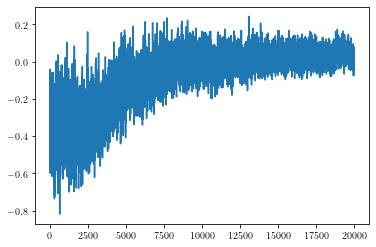

In [62]:
plt.plot(properties.pressure + properties.density / temperature)

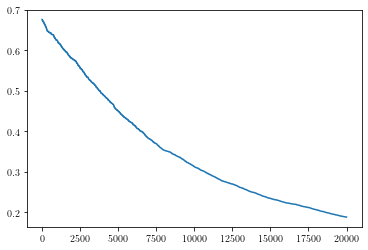

In [64]:
plt.plot(properties.density)

# $\mu$VT Simulation

In [18]:
density = 0.5
nparticles = 500
volume = nparticles / density
temperature = 1.0

potential = Potential.lennard_jones(1.0, 1.0, tail_correction=True)
system = System.insert_particles(nparticles, volume, temperature, chemical_potential-2, 3.0, potential, nparticles + 100, 1000000)

displace_particle = MCMove.displace_particle(0.1, 0.4, nparticles)
insert_delete_particle = MCMove.insert_delete_particle(chemical_potential)
mc = MonteCarlo([displace_particle, insert_delete_particle], [3, 1], temperature)

simulation = Simulation.monte_carlo(system, mc, 500)

In [19]:
%%time
print("Equilibration")
simulation.run(nparticles * 1000)

simulation.deactivate_propagator_updates()
props = Observer.properties(100)
simulation.add_observer(props)

print("Production")
simulation.run(nparticles * 5000)

Equilibration
Production
CPU times: user 348 ms, sys: 3.96 ms, total: 352 ms
Wall time: 351 ms


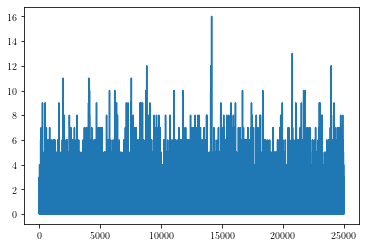

In [20]:
properties = pd.DataFrame(props.data)
plt.plot(properties.nparticles)

In [33]:
properties.nparticles

0        2.0
1        1.0
2        3.0
3        4.0
4        1.0
        ... 
24995    1.0
24996    2.0
24997    0.0
24998    2.0
24999    1.0
Name: nparticles, Length: 25000, dtype: float64